### Here we analyze expected (average) SLO-compliance levels of each streaming configurations under in different experimental setups.

In [2]:
import pandas as pd
from models.service_level_objectives import ServiceLevelObjectives
from utils.variables import *
import matplotlib.pyplot as plt
from models.slo_fulfillment import SLOFulfillment
from utils.preprocessing.heating_metric_preprocessor_wrapper import HeatingMetricPreprocessorWrapper

In [37]:
df = pd.read_csv("metrics.csv")

In [38]:
def plot_and_print_stats(df, slos):
    fulfillments = {
        "avg_actual_fps": [],
        "network_usage": [],
        "thermal_state": [],
        "stream_fulfillment": [],
        "avg_render_scale_factor": [],
        "qos": [],
        "qoe": [],
        "slo_fulfillment": [],
    }
    for params, d in df.groupby(PARAM_LIST):
        sfs = [SLOFulfillment.calc(row, slos) for i, row in d.iterrows()]
        mean_sf, std_sf = SLOFulfillment.calc_stats(sfs)

        print(f"[Configuration {str(params):<13}] SLO compliance: mean={mean_sf.slo_fulfillment:.4f}, std={std_sf.slo_fulfillment:.4f}")

        for key in fulfillments.keys():
            fulfillments[key].append((params, mean_sf.__getattribute__(key), std_sf.__getattribute__(key)))

    fig, axes = plt.subplots(4, 2, figsize=(8, 6))
    plt.tight_layout()
    axes = axes.flatten()

    for i, (key, values) in enumerate(fulfillments.items()):
        values = sorted(values, key=lambda x: x[1], reverse=True)

        print(f"Max expected {key:<23} SLO compliance: {values[0][1]:.4f}")

        axes[i].plot(range(len(values)), [x[1] for x in values])
        axes[i].fill_between(range(len(values)), [x[1] - x[2] for x in values], [x[1] + x[2] for x in values], alpha=0.2)
        axes[i].set_title(key)

#### Base experiment

[Configuration (180, 1, 5)  ] SLO compliance: mean=0.4988, std=0.0007
[Configuration (180, 1, 10) ] SLO compliance: mean=0.5515, std=0.0022
[Configuration (180, 1, 15) ] SLO compliance: mean=0.6032, std=0.0020
[Configuration (180, 1, 20) ] SLO compliance: mean=0.6111, std=0.0000
[Configuration (180, 1, 25) ] SLO compliance: mean=0.6110, std=0.0011
[Configuration (180, 1, 30) ] SLO compliance: mean=0.6111, std=0.0000
[Configuration (180, 2, 5)  ] SLO compliance: mean=0.6099, std=0.0006
[Configuration (180, 2, 10) ] SLO compliance: mean=0.6620, std=0.0020
[Configuration (180, 2, 15) ] SLO compliance: mean=0.7122, std=0.0027
[Configuration (180, 2, 20) ] SLO compliance: mean=0.7221, std=0.0000
[Configuration (180, 2, 25) ] SLO compliance: mean=0.7221, std=0.0004
[Configuration (180, 2, 30) ] SLO compliance: mean=0.7221, std=0.0000
[Configuration (180, 5, 5)  ] SLO compliance: mean=0.7443, std=0.0005
[Configuration (180, 5, 10) ] SLO compliance: mean=0.7966, std=0.0026
[Configuration (180,

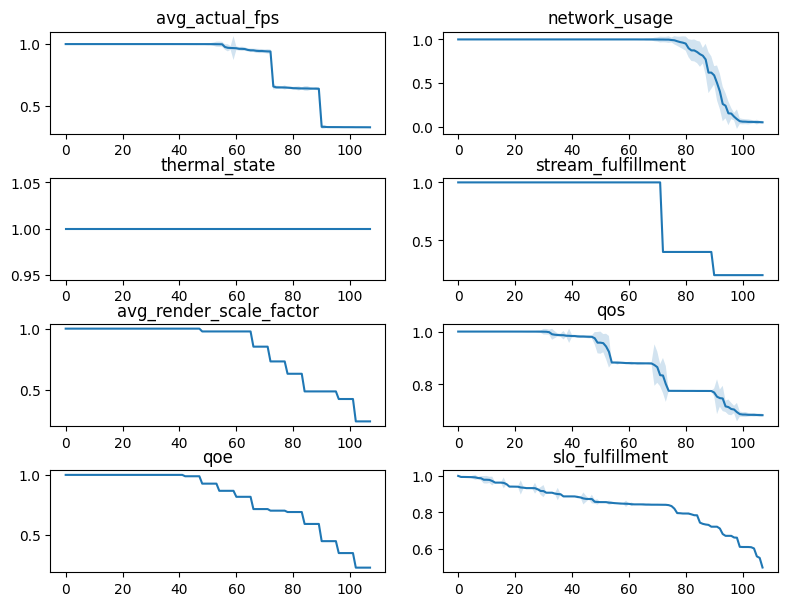

In [39]:
slos_main = ServiceLevelObjectives(
    max_network_usage=10 * 1024 * 1024,
    min_avg_fps=15.0,
    min_streams=5,
    max_avg_render_scale_factor=1.6,
    max_thermal_state=1,
)
plot_and_print_stats(df, slos_main)

### Rate limit

[Configuration (180, 1, 5)  ] SLO compliance: mean=0.4740, std=0.0005
[Configuration (180, 1, 10) ] SLO compliance: mean=0.5280, std=0.0011
[Configuration (180, 1, 15) ] SLO compliance: mean=0.5775, std=0.0026
[Configuration (180, 1, 20) ] SLO compliance: mean=0.5861, std=0.0000
[Configuration (180, 1, 25) ] SLO compliance: mean=0.5861, std=0.0000
[Configuration (180, 1, 30) ] SLO compliance: mean=0.5861, std=0.0000
[Configuration (180, 2, 5)  ] SLO compliance: mean=0.5600, std=0.0004
[Configuration (180, 2, 10) ] SLO compliance: mean=0.6126, std=0.0028
[Configuration (180, 2, 15) ] SLO compliance: mean=0.6636, std=0.0031
[Configuration (180, 2, 20) ] SLO compliance: mean=0.6721, std=0.0000
[Configuration (180, 2, 25) ] SLO compliance: mean=0.6721, std=0.0005
[Configuration (180, 2, 30) ] SLO compliance: mean=0.6721, std=0.0006
[Configuration (180, 5, 5)  ] SLO compliance: mean=0.6194, std=0.0003
[Configuration (180, 5, 10) ] SLO compliance: mean=0.6712, std=0.0015
[Configuration (180,

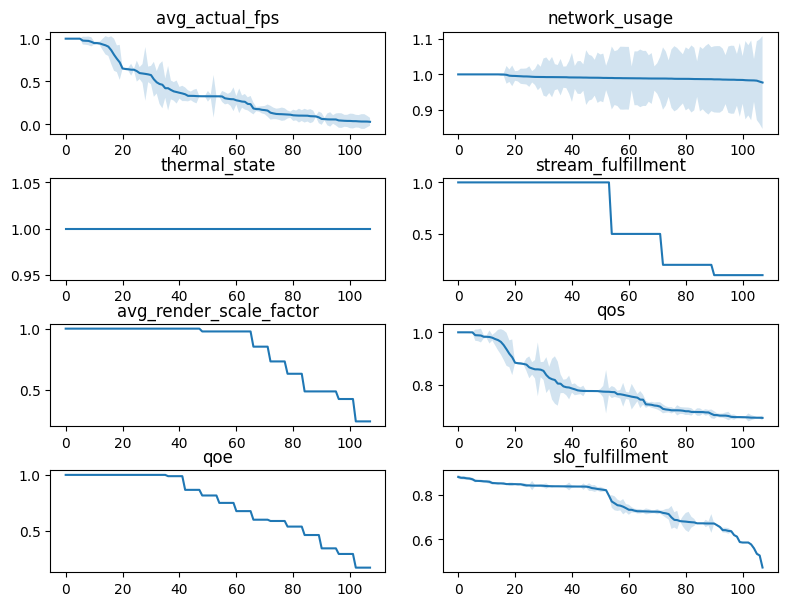

In [40]:
slos_rate_limit = ServiceLevelObjectives(
    max_network_usage=1 * 1024 * 1024,
    min_avg_fps=15.0,
    min_streams=10,
    max_avg_render_scale_factor=1.6,
    max_thermal_state=1,
)
df_rate_limit = pd.read_csv("metrics_rate_limit.csv")
plot_and_print_stats(df_rate_limit, slos_rate_limit)

### Device Heating

[Configuration (180, 1, 5)  ] SLO compliance: mean=0.4988, std=0.0007
[Configuration (180, 1, 10) ] SLO compliance: mean=0.5515, std=0.0022
[Configuration (180, 1, 15) ] SLO compliance: mean=0.6032, std=0.0020
[Configuration (180, 1, 20) ] SLO compliance: mean=0.6111, std=0.0000
[Configuration (180, 1, 25) ] SLO compliance: mean=0.6110, std=0.0011
[Configuration (180, 1, 30) ] SLO compliance: mean=0.6111, std=0.0000
[Configuration (180, 2, 5)  ] SLO compliance: mean=0.6099, std=0.0006
[Configuration (180, 2, 10) ] SLO compliance: mean=0.6620, std=0.0020
[Configuration (180, 2, 15) ] SLO compliance: mean=0.7122, std=0.0027
[Configuration (180, 2, 20) ] SLO compliance: mean=0.7221, std=0.0000
[Configuration (180, 2, 25) ] SLO compliance: mean=0.7221, std=0.0004
[Configuration (180, 2, 30) ] SLO compliance: mean=0.7221, std=0.0000
[Configuration (180, 5, 5)  ] SLO compliance: mean=0.7443, std=0.0005
[Configuration (180, 5, 10) ] SLO compliance: mean=0.7964, std=0.0064
[Configuration (180,

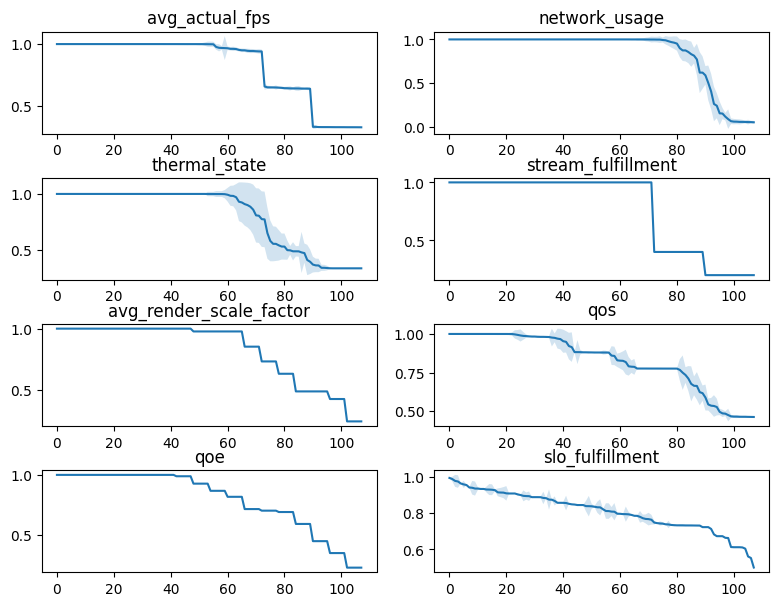

In [41]:
df_heated = pd.DataFrame(df)
df_heated["thermal_state"] = df["network_usage"].map(lambda x: HeatingMetricPreprocessorWrapper.temperature_to_thermal_state(HeatingMetricPreprocessorWrapper.network_to_temperature(x)))
slos_heat = ServiceLevelObjectives(
    max_network_usage=10 * 1024 * 1024,
    min_avg_fps=15.0,
    min_streams=5,
    max_avg_render_scale_factor=1.6,
    max_thermal_state=1,
)
plot_and_print_stats(df_heated, slos_heat)

### Change SLOs \#1 (difficult SLOs)

[Configuration (180, 1, 5)  ] SLO compliance: mean=0.3826, std=0.0003
[Configuration (180, 1, 10) ] SLO compliance: mean=0.4089, std=0.0011
[Configuration (180, 1, 15) ] SLO compliance: mean=0.4229, std=0.0157
[Configuration (180, 1, 20) ] SLO compliance: mean=0.4342, std=0.0299
[Configuration (180, 1, 25) ] SLO compliance: mean=0.4489, std=0.0349
[Configuration (180, 1, 30) ] SLO compliance: mean=0.4727, std=0.0374
[Configuration (180, 2, 5)  ] SLO compliance: mean=0.4046, std=0.0003
[Configuration (180, 2, 10) ] SLO compliance: mean=0.4169, std=0.0186
[Configuration (180, 2, 15) ] SLO compliance: mean=0.4241, std=0.0319
[Configuration (180, 2, 20) ] SLO compliance: mean=0.4233, std=0.0318
[Configuration (180, 2, 25) ] SLO compliance: mean=0.4282, std=0.0366
[Configuration (180, 2, 30) ] SLO compliance: mean=0.4414, std=0.0361
[Configuration (180, 5, 5)  ] SLO compliance: mean=0.4144, std=0.0242
[Configuration (180, 5, 10) ] SLO compliance: mean=0.3750, std=0.0208
[Configuration (180,

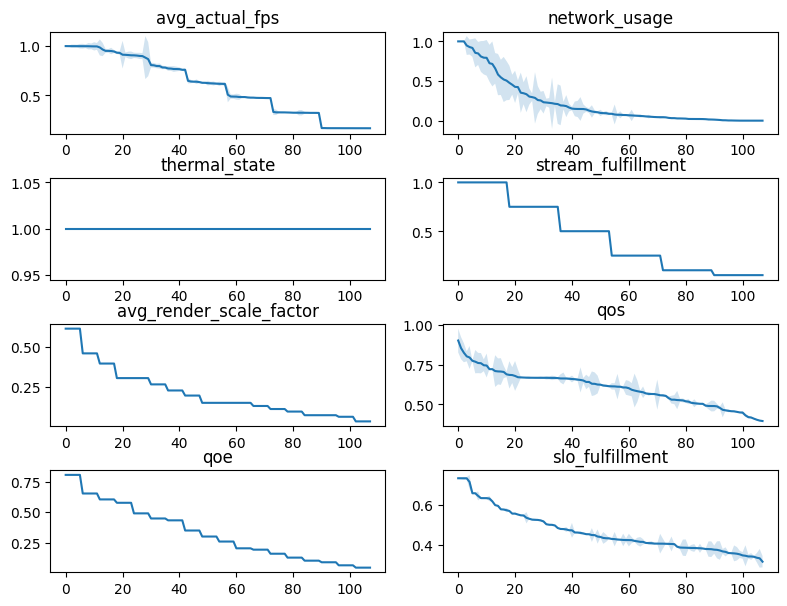

In [42]:
slos_difficult = ServiceLevelObjectives(
    max_network_usage=250 * 1024,
    min_avg_fps=30.0,
    min_streams=20,
    max_avg_render_scale_factor=0.25,
    max_thermal_state=1,
)
plot_and_print_stats(df, slos_difficult)

### Change SLOs \#2 (less difficult SLOs)

[Configuration (180, 1, 5)  ] SLO compliance: mean=0.4509, std=0.0007
[Configuration (180, 1, 10) ] SLO compliance: mean=0.5036, std=0.0022
[Configuration (180, 1, 15) ] SLO compliance: mean=0.5553, std=0.0020
[Configuration (180, 1, 20) ] SLO compliance: mean=0.5632, std=0.0000
[Configuration (180, 1, 25) ] SLO compliance: mean=0.5631, std=0.0011
[Configuration (180, 1, 30) ] SLO compliance: mean=0.5632, std=0.0000
[Configuration (180, 2, 5)  ] SLO compliance: mean=0.5141, std=0.0006
[Configuration (180, 2, 10) ] SLO compliance: mean=0.5662, std=0.0020
[Configuration (180, 2, 15) ] SLO compliance: mean=0.6164, std=0.0027
[Configuration (180, 2, 20) ] SLO compliance: mean=0.6263, std=0.0000
[Configuration (180, 2, 25) ] SLO compliance: mean=0.6263, std=0.0004
[Configuration (180, 2, 30) ] SLO compliance: mean=0.6263, std=0.0000
[Configuration (180, 5, 5)  ] SLO compliance: mean=0.5794, std=0.0005
[Configuration (180, 5, 10) ] SLO compliance: mean=0.6316, std=0.0035
[Configuration (180,

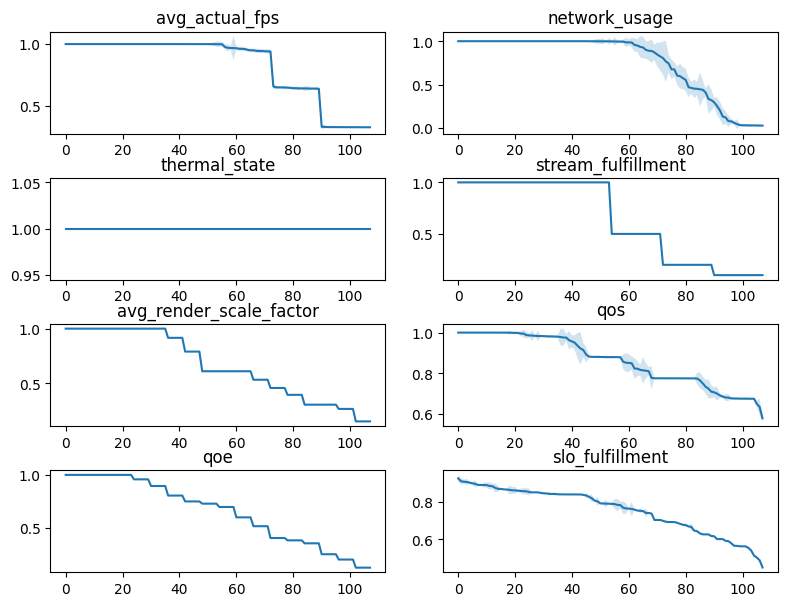

In [43]:
slos_difficult2 = ServiceLevelObjectives(
    max_network_usage=5 * 1024 * 1024,
    min_avg_fps=15.0,
    min_streams=10,
    max_avg_render_scale_factor=1.,
    max_thermal_state=1,
)
plot_and_print_stats(df, slos_difficult2)